# Analyse Cancer Data


## Task A
## Enable the user to get data from a CSV file

In [1]:
from src.wrangling.extract_data_csv import get_csv_data
from src.wrangling.userInterface.user_selections import data_path, set_user_file

# prompt the user to enter the dataset to be analysed
file_name = set_user_file()
patient_headers, csv_reader = get_csv_data(data_path, file_name)


The available files to analyse, in the 'Data' directory:
lung_cancer_data.csv

Dataset headers, lung_cancer_data.csv:
----------------------------------
Patient_ID	
Age	
Gender	
Smoking_History	
Tumor_Size_mm	
Tumor_Location	
Stage	
Treatment	
Survival_Months	
Ethnicity	
Insurance_Type	
Family_History	
Comorbidity_Diabetes	
Comorbidity_Hypertension	
Comorbidity_Heart_Disease	
Comorbidity_Chronic_Lung_Disease	
Comorbidity_Kidney_Disease	
Comorbidity_Autoimmune_Disease	
Comorbidity_Other	
Performance_Status	
Blood_Pressure_Systolic	
Blood_Pressure_Diastolic	
Blood_Pressure_Pulse	
Haemoglobin_Level	
White_Blood_Cell_Count	
Platelet_Count	
Albumin_Level	
Alkaline_Phosphatase_Level	
Alanine_Aminotransferase_Level	
Aspartate_Aminotransferase_Level	
Creatinine_Level	
LDH_Level	
Calcium_Level	
Phosphorus_Level	
Glucose_Level	
Potassium_Level	
Sodium_Level	
Smoking_Pack_Years


## a1. Retrieve demographic information: age, gender, smoking history, and ethnicity based on the patient ID

In [2]:
from src.wrangling.extract_data_csv import demographic_info
from src.wrangling.userInterface.user_selections import set_patient_id

demographic_info(set_patient_id(), csv_reader, patient_headers)
        

Demographic info for patient ID: 54773
| Age             | Gender          | Smoking_History | Ethnicity       |
-------------------------------------------------------------------------
| 51              | Male            | Never Smoked    | Hispanic        |



## a2. Retrieve medical history details including family history of lung cancer, comorbidities of diabetes disease, comorbidities of kidney disease, and the haemoglobin level associated with a certain ethnicity. 

In [3]:
from src.wrangling.extract_data_csv import medical_history
from src.wrangling.userInterface.user_selections import set_patient_ethnicity

medical_history(set_patient_ethnicity(), csv_reader, patient_headers)
        

Records for patients of Hispanic ethnicity:
| Family_History             | Comorbidity_Diabetes       | Comorbidity_Kidney_Disease | Haemoglobin_Level          |
---------------------------------------------------------------------------------------------------------------------
| No                         | Yes                        | Yes                        | 13.54                      |
| Yes                        | No                         | No                         | 15.93                      |
| Yes                        | No                         | Yes                        | 10.95                      |
| Yes                        | Yes                        | Yes                        | 15.28                      |
| No                         | Yes                        | No                         | 10.19                      |
| No                         | No                         | No                         | 15.37                      |
| No        

## a3. Retrieve treatment details including age, tumor size, tumor location, and tumor stage of patients who have survived more than 100 months on a certain treatment. 

In [5]:
from src.wrangling.extract_data_csv import survival_treatment_details
survival_period_months = 100

survival_treatment_details(survival_period_months, csv_reader, patient_headers)


Patient records for survival greater than 100 months on treatment:

| Age            | Tumor_Size_mm  | Tumor_Location | Stage          |
---------------------------------------------------------------------
| 58             | 78.45          | Lower Lobe     | Stage I        |
| 37             | 87.27          | Lower Lobe     | Stage IV       |
| 48             | 68.1           | Lower Lobe     | Stage IV       |
| 51             | 35.15          | Upper Lobe     | Stage I        |
| 31             | 86.46          | Upper Lobe     | Stage III      |
| 41             | 69.33          | Upper Lobe     | Stage III      |
| 51             | 28.12          | Middle Lobe    | Stage III      |
| 78             | 40.47          | Middle Lobe    | Stage IV       |
| 50             | 17.51          | Lower Lobe     | Stage IV       |
| 76             | 58.55          | Lower Lobe     | Stage IV       |
| 73             | 61.59          | Lower Lobe     | Stage III      |
| 76             | 20.

## a4. For patients that have high blood pressure...
### display treatment type, insurance type, performance status and whether the patient has chronic lung disease.



In [6]:
from src.wrangling.extract_data_csv import hypertension_patients
''' 
    use a suitable value for patient's blood pressure above a desired target
    for cancer patient's. Value obtained from:
    https://cardiooncologyjournal.biomedcentral.com/articles/10.1186/s40959-023-00197-8
'''
blood_press_diastolic_target = 140

hypertension_patients(blood_press_diastolic_target, csv_reader, patient_headers)


Treatment records for patients with diastolic blood pressure above 140 target or hypertension:

| Treatment                        | Insurance_Type                   | Performance_Status               | Comorbidity_Chronic_Lung_Disease |
---------------------------------------------------------------------------------------------------------------------------------------------
| Surgery                          | Medicare                         | 3                                | No                               |
| Radiation Therapy                | Private                          | 4                                | No                               |
| Chemotherapy                     | Other                            | 0                                | Yes                              |
| Chemotherapy                     | Medicare                         | 1                                | No                               |
| Radiation Therapy                | Medicaid       

# Task B

In [7]:
import pandas as pd
from src.wrangling.userInterface.user_selections import set_patient_ethnicity, data_path

lung_cancer_df = pd.read_csv(data_path+file_name, sep=',', encoding='utf8')

# lung_cancer_df.head()

## b1. Identify the top 3 treatments for a certain ethnicity where patients have survived more than 100 months.

In [8]:
from src.wrangling.extract_data_pd import patient_long_survival

ethnicity_selection = set_patient_ethnicity()

patient_long_survival(ethnicity_selection, lung_cancer_df)

Top three treatments for Asian group - Surival > 100 months
| Treatment         |   count |
|:------------------|--------:|
| Surgery           |     288 |
| Radiation Therapy |     224 |
| Chemotherapy      |     149 |


## b2. Analyse the average white blood cell counts for certain treatments based on a certain ethnicity.

In [9]:
from src.wrangling.extract_data_pd import treatment_white_blood_count
from src.wrangling.userInterface.user_selections import set_patient_treatment

treatment = set_patient_treatment()
treatment_white_blood_count(ethnicity_selection, treatment, lung_cancer_df)

Average white blood cell count for Surgery in Asian ethnic group
6.761765882941471


## b3. Analyse the average number of smoking packs for patients in each treatment group, with a blood pressure (pulse) over 90 and a tumor size smaller than 15.0 mm, based by tumor location

In [10]:
from src.wrangling.extract_data_pd import lung_tumor_data

lung_tumor_data(lung_cancer_df=lung_cancer_df, pulse=90, tumor_size_mm=15.0)


Average numnber of smoking packs for patients with pulse over 90 and tumor size over 15.0 mm
Tumor_Location  Treatment        
Lower Lobe      Chemotherapy         53.168824
                Radiation Therapy    41.365357
                Surgery              51.673684
                Targeted Therapy     43.178000
Middle Lobe     Chemotherapy         51.408966
                Radiation Therapy    50.610741
                Surgery              53.086923
                Targeted Therapy     48.728000
Upper Lobe      Chemotherapy         55.259167
                Radiation Therapy    54.349583
                Surgery              54.312941
                Targeted Therapy     42.567647
Name: Smoking_Pack_Years, dtype: float64


## b4. Average survival duration and blood pressure metrics for each treatment at each cancer stage, based on gender.

In [11]:
from src.wrangling.extract_data_pd import survival_blood_pressure
from src.wrangling.userInterface.user_selections import set_patient_gender

survival_blood_pressure(set_patient_gender(), lung_cancer_df)


average survival duration and blood pressure metrics for Females
| Treatment         | Stage     |   Survival_Months |   Blood_Pressure_Diastolic |   Blood_Pressure_Systolic |
|:------------------|:----------|------------------:|---------------------------:|--------------------------:|
| Chemotherapy      | Stage I   |           60.2487 |                    84.9358 |                   135.046 |
| Chemotherapy      | Stage II  |           58.1472 |                    84.8392 |                   135.858 |
| Chemotherapy      | Stage III |           61.2806 |                    84.0466 |                   134.417 |
| Chemotherapy      | Stage IV  |           59.4185 |                    83.9847 |                   134.874 |
| Radiation Therapy | Stage I   |           60.1989 |                    84.4966 |                   136.866 |
| Radiation Therapy | Stage II  |           60.2343 |                    84.1806 |                   134.776 |
| Radiation Therapy | Stage III |           60.

/Users/danralley/projects/msc-ai-data-science/semsester-1/com731/COM731-Assessment/src/wrangling/extract_data_pd.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_cancer_gender_df.drop(["Gender"], inplace=True, axis=1)


## Task C
### c1. Create a chart to illustrate the proportion of cancer treatments among a certain ethnicity as specified by the user.

In [12]:
# enables displaying plot output inline with the code cell
%matplotlib inline 


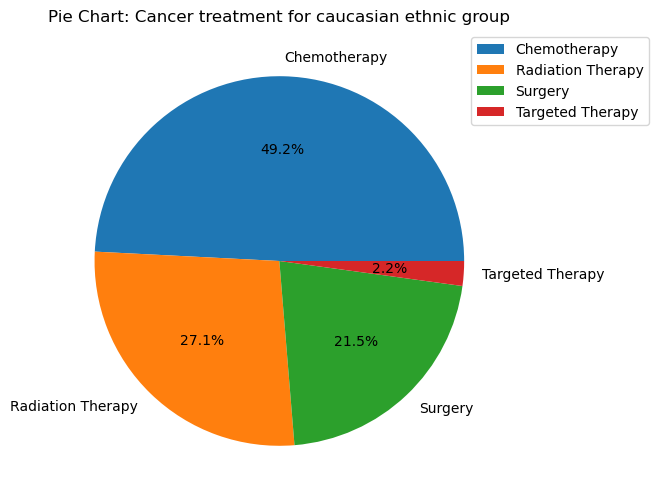

In [13]:
from src.wrangling.userInterface.user_selections import set_patient_ethnicity
from src.wrangling.extract_data_pd import treatment_for_ethnicity
from src.wrangling.userInterface.visualise.plot_data import plot_treatment_proportion_for_ethnicity
from src.wrangling.userInterface.user_selections import check_for_quit

ethnicity = set_patient_ethnicity()

if not check_for_quit(ethnicity):
    treatment_series = treatment_for_ethnicity(ethnicity, lung_cancer_df)
    plot_treatment_proportion_for_ethnicity(ethnicity, treatment_series)


## c2. Create a chart to show the trend of average smoking packs consumption across different cancer stages for each ethnicity within a single chart.

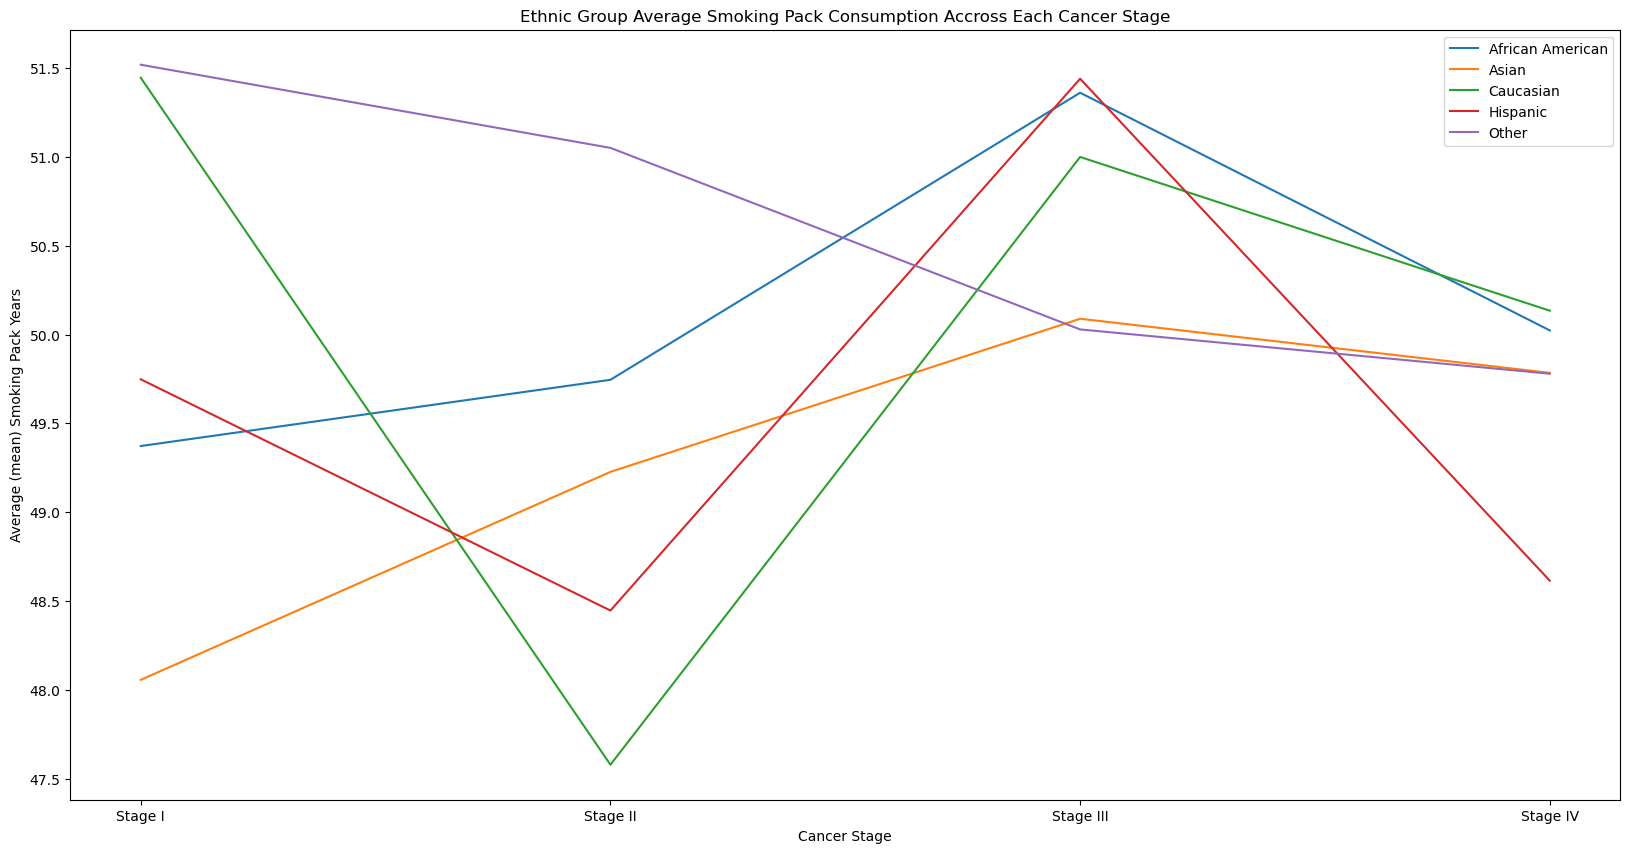

,Ethnicity,Stage,Smoking_Pack_Years
0,African American,Stage I,49.372350
1,African American,Stage II,49.745238
2,African American,Stage III,51.361477
3,African American,Stage IV,50.023288
4,Asian,Stage I,48.056043
5,Asian,Stage II,49.226890
6,Asian,Stage III,50.089038
7,Asian,Stage IV,49.784393
8,Caucasian,Stage I,51.445988
9,Caucasian,Stage II,47.578102


In [14]:
from src.wrangling.extract_data_pd import smoking_packs_cancer_stage

smoking_packs_cancer_stage(lung_cancer_df)


## c3. Create a chart that visually compares the average of all blood pressure types across different treatment types within a single chart

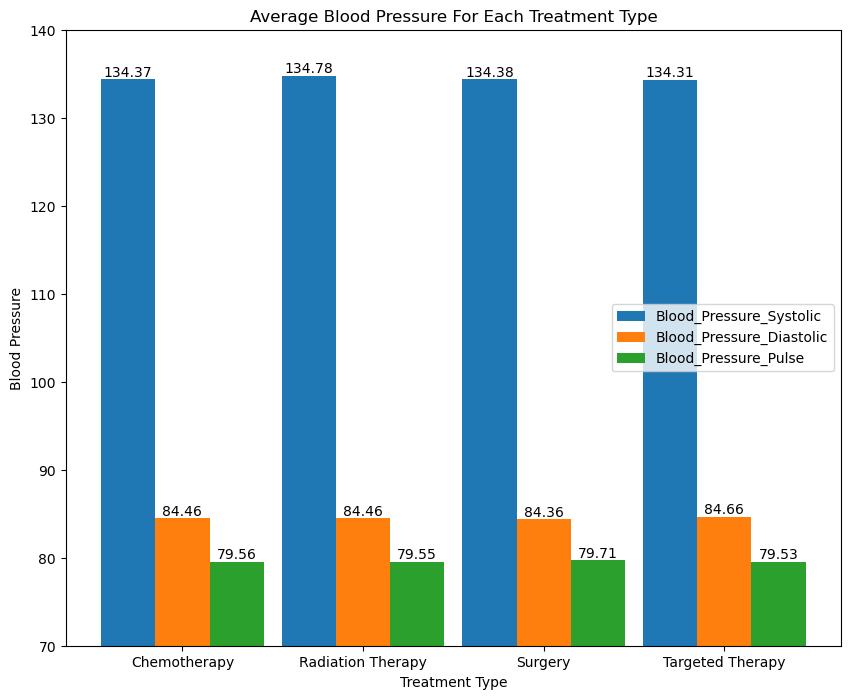

In [15]:
from src.wrangling.extract_data_pd import blood_pressure_treatment
from src.wrangling.userInterface.visualise.plot_data import plot_blood_pressure_treatment

blood_pressure_data = blood_pressure_treatment(lung_cancer_df)
plot_blood_pressure_treatment(blood_pressure_data)


## c4. Create a visualisation of your selection to showcase information related to patients, treatment, or conditions that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

### problem statement

Show the pattern of treatment types for each insurer by using the count of each treatment type

### Solution

A bar chart showing the following information:

    - x axis of labels corresponding to each insurer
    - For each insurer, a bar containing the counts of each treatment
    - y axis shows the treatment count

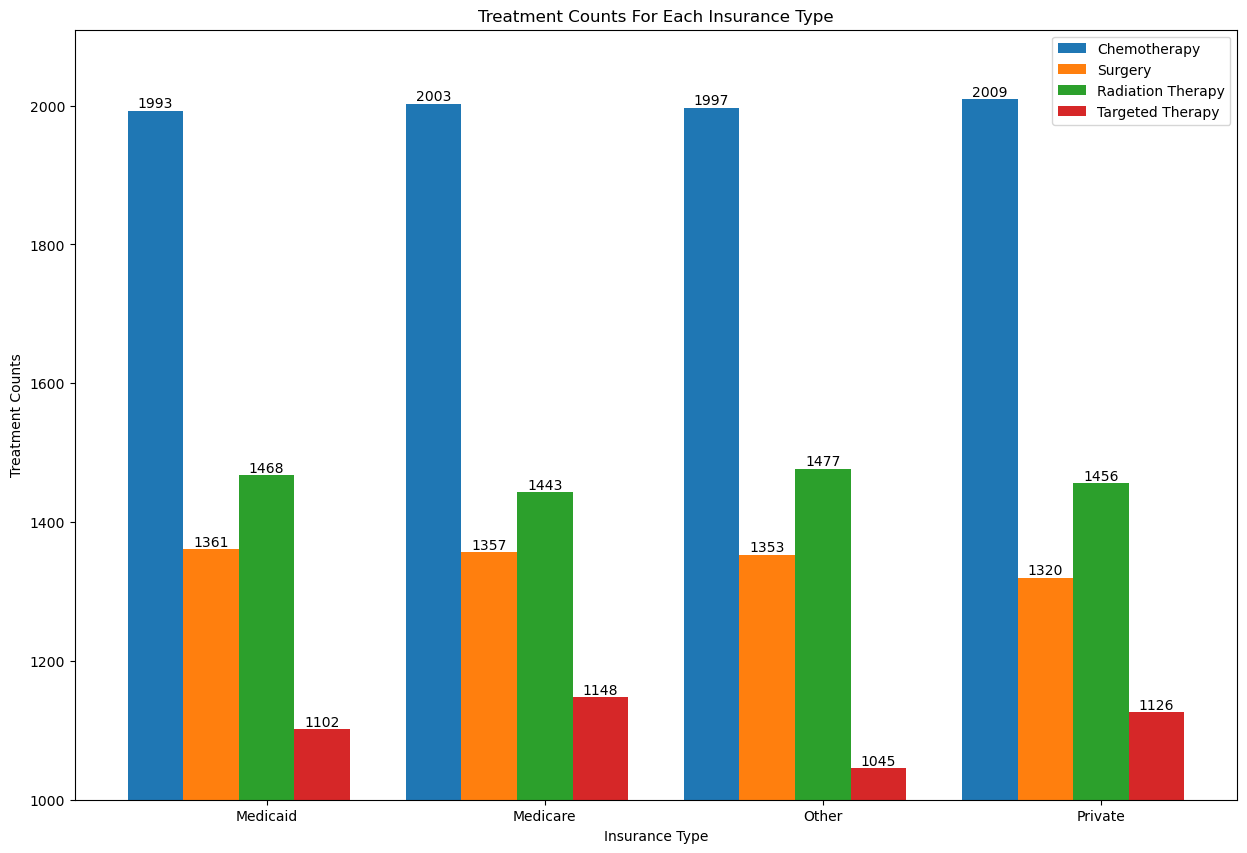

In [16]:
from src.wrangling.extract_data_pd import insurer_treatment_data
from src.wrangling.userInterface.visualise.plot_data import plot_insurer_treatment_data

axis_data = insurer_treatment_data(lung_cancer_df)
plot_insurer_treatment_data(axis_data)
